<a href="https://colab.research.google.com/github/SachiSachu/Nitg/blob/main/test_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

edges = int(input('number of edge devices: ')) #this is to take number of devices input

iot = int(input("number of IOT devices: ")) #this line takes number of IoT devices
edgeco = []                                 #this array is store the co-ordinates of edge devices
for i in range(edges):                      #this loop creates the random x,y coordinates 
  ar1 = []
  x = random.randint(0,100)
  ar1.append(x)
  y = random.randint(0,100)
  ar1.append(y)
  edgeco.append(ar1)
#print(np.array(edgeco))

iotco = []                                   #this array holds the the co-ordinates of IoT devices
for i in range(iot):                         #this loop craetes the random x,y coordinates
  ar1 = []
  x = random.randint(0,100)
  ar1.append(x)
  y = random.randint(0,100)
  ar1.append(y)
  iotco.append(ar1)
#print(np.array(iotco))

dist = []                                   #this dist array is to store euclidean distance between edge devices and iot devices
for i in range(iot):                        #this loop is to calculate the distance
  ar1 = []
  for j in range(edges):
    x1 = (iotco[i][0]-edgeco[j][0])**2 + (iotco[i][1]-edgeco[j][1])**2    #euclidean distance formula sqrt( (x2-x1)^2 + (y2-y1)^2 ).... 
                                                                          #but here we have not calculated square root..it is done in the next line
    ar1.append(int(math.sqrt(x1)))                                        #here we have stored suqare root of (x2-x1)^2 + (y2-y1)^2
  dist.append(ar1)
#print(np.array(dist))

lim = int(input('enter the radius limit: '))                              #this lim is connection range between IoT device and edge device 
conn = []                                                                 #this conn array holds the connection possibility between IoT device 
                                                                          #and edge device if connection is made then 1 or 0
for i in range(iot):
  ar1 = []
  for j in range(edges):
    if dist[i][j] <=lim:
      ar1.append(1)
    else:
      ar1.append(0)
  conn.append(ar1)
#print(np.array(conn))

bucket = []                               #this bucket holds the device info which one connected to which edge devices
for m in range(edges):
  ab = []
  bucket.append(ab)
nonconn = []
for i in range(iot):
  sum1 = 0
  for j in range(edges):
    if conn[i][j] == 1:
      bucket[j].append(i+1)
  for k in range(edges):
    sum1 = sum1 + conn[i][k]
  if sum1==0:
    nonconn.append(i+1)

bucket

number of edge devices: 8
number of IOT devices: 32
enter the radius limit: 40


[[6, 9, 14, 17, 22, 23, 25, 27, 28, 29, 30],
 [2, 3, 6, 8, 9, 10, 12, 14, 16, 21, 22, 24, 26, 30, 31, 32],
 [1, 2, 3, 7, 8, 9, 11, 15, 18, 19, 20],
 [5, 6, 13, 17, 19, 22, 23, 25, 28, 29, 30],
 [2,
  3,
  6,
  8,
  9,
  10,
  12,
  14,
  17,
  18,
  20,
  21,
  22,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [2, 3, 4, 10, 12, 14, 16, 21, 24, 26, 31, 32],
 [1, 2, 7, 8, 11, 18, 20],
 [2, 3, 4, 7, 11, 12, 16, 26, 31, 32]]

In [28]:
loadedge  = int(input('enter the load limit of edge devices: '))
#declaring IoT loads
loadiot = []                    #load iot holds the data produced by each iot device
for l in range(iot):            
  k = random.randint(50,250)    #here we have given data limit 50-250 so that it can pick within the given range
  loadiot.append(k)

enter the load limit of edge devices: 1000


In [29]:
condev = [] #this is to store which devices has  connected to server
check = []
lb = []     #this is store the load on each edge server
for i in bucket:
  abc = []
  sum1 = 0
  total = 0
  for j in i:
    if sum1 + loadiot[j-1] < loadedge:
      sum1 += loadiot[j-1] 
      if j not in check:
        total += loadiot[j-1]
        check.append(j)
        abc.append(j)
      #print(loadiot[j-1])
  lb.append(total)
  condev.append(abc)
print("load on each edge devices: ",lb,"\n server connection without load balance:  ")
condev

load on each edge devices:  [941, 759, 438, 490, 0, 374, 228, 116] 
 server connection without load balance:  


[[6, 9, 14, 17, 22, 23, 25, 27, 28, 29],
 [2, 3, 8, 10, 21],
 [1, 7, 11],
 [5, 13, 19],
 [],
 [4, 12, 32],
 [18, 20],
 [31]]

In [30]:
dict1 = {}
k = 0
for i in lb:
  k += 1 
  dict1[k] = i
dict1

{1: 941, 2: 759, 3: 438, 4: 490, 5: 0, 6: 374, 7: 228, 8: 116}

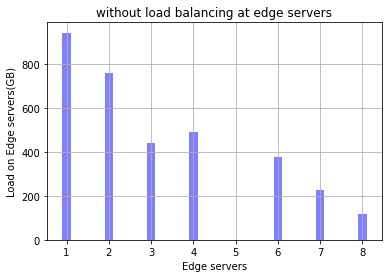

In [31]:
x = dict1.keys()
y = dict1.values()
plt.grid()
plt.xlabel("Edge servers")
plt.ylabel("Load on Edge servers(GB)")
plt.title("without load balancing at edge servers")
plt.bar(x,y, color='blue', width=0.2, alpha=0.5)
plt.show()